# 1 
загрузите файл HR.csv в pandas dataframe

In [138]:
import pandas as pd
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2 
Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [49]:
import pandas as pd

df_avg = df

# Рассчитываем среднее
mean = df_avg[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']].mean()

# Рассчитываем медиану
median = df_avg[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']].median()

# Рассчитываем моду
mode = df_avg[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']].mode().iloc[0]

# Рассчитываем минимум
minimum = df_avg[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']].min()

# Рассчитываем максимум
maximum = df_avg[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']].max()

# Рассчитываем стандартное отклонение
std_dev = df_avg[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']].std()

# Выводим результаты
print("Среднее:")
print(mean)
print("\nМедиана:")
print(median)
print("\nМода:")
print(mode)
print("\nМинимум:")
print(minimum)
print("\nМаксимум:")
print(maximum)
print("\nСтандартное отклонение:")
print(std_dev)

Среднее:
satisfaction_level        0.612834
last_evaluation           0.716102
average_montly_hours    201.050337
time_spend_company        3.498233
number_project            3.803054
dtype: float64

Медиана:
satisfaction_level        0.64
last_evaluation           0.72
average_montly_hours    200.00
time_spend_company        3.00
number_project            4.00
dtype: float64

Мода:
satisfaction_level        0.10
last_evaluation           0.55
average_montly_hours    135.00
time_spend_company        3.00
number_project            4.00
Name: 0, dtype: float64

Минимум:
satisfaction_level       0.09
last_evaluation          0.36
average_montly_hours    96.00
time_spend_company       2.00
number_project           2.00
dtype: float64

Максимум:
satisfaction_level        1.0
last_evaluation           1.0
average_montly_hours    310.0
time_spend_company       10.0
number_project            7.0
dtype: float64

Стандартное отклонение:
satisfaction_level       0.248631
last_evaluation          

# 3 
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

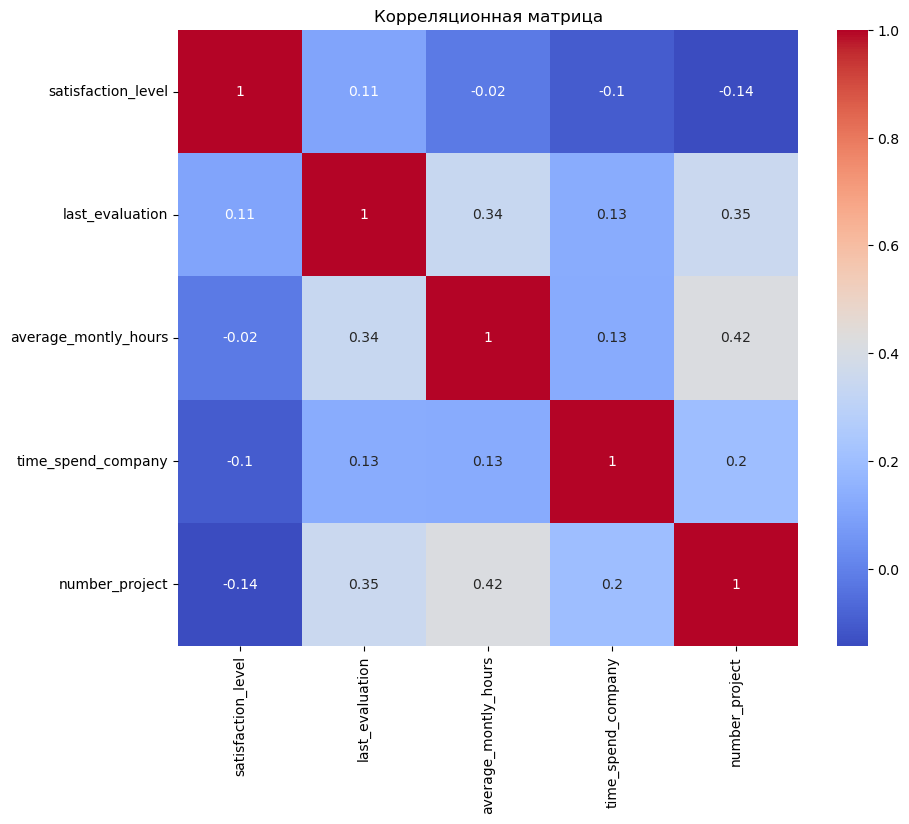

Cамые скоррелированные переменные:
number_project  average_montly_hours    0.417211
dtype: float64

Наименее скоррелированные переменные:
number_project  satisfaction_level   -0.14297
dtype: float64


,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,number_project
satisfaction_level,1.000000,0.105021,-0.020048,-0.100866,-0.142970
last_evaluation,0.105021,1.000000,0.339742,0.131591,0.349333
average_montly_hours,-0.020048,0.339742,1.000000,0.127755,0.417211
time_spend_company,-0.100866,0.131591,0.127755,1.000000,0.196786
number_project,-0.142970,0.349333,0.417211,0.196786,1.000000


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# матрица значений корреляции
corr_matrix = df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'number_project']].corr()

# визуализация 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()



# Определение двух самых скоррелированных переменных
max_corr = corr_matrix.unstack().sort_values(ascending=False)
most_correlated = max_corr[max_corr < 1].head(1)
print('Cамые скоррелированные переменные:')
print(most_correlated)

# Определение двух наименее скоррелированных переменных
min_corr = corr_matrix.unstack().sort_values()
least_correlated = min_corr.head(1)
print('\nНаименее скоррелированные переменные:')
print(least_correlated)
corr_matrix.head(10)


# 4
Рассчитайте сколько сотрудников работает в каждом
департаменте

In [134]:
df_left = df.loc[df['left'] == 0]
df_dep = df_left['department'].value_counts()
print(f'Количество сотрудников в каждом департаменте:\n{df_dep}')

Количество сотрудников в каждом департаменте:
department
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: count, dtype: int64


# 5 
Показать распределение сотрудников по зарплатам.

In [135]:
salary_distribution = df['salary'].value_counts()
print(f'Распределение сотрудников по зарплатам:\n{salary_distribution}')

Распределение сотрудников по зарплатам:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


# 6 
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [136]:
salary_dep = df.groupby('department')['salary'].value_counts()
print(f'Распределение сотрудников по зарплатам в каждом департаменте:\n{salary_dep}')

Распределение сотрудников по зарплатам в каждом департаменте:
department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   medium     225
             high       225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: count, dtype: int64


# 7
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [99]:
import pandas as pd
from scipy import stats

high_sal = df[df['salary'] == 'high']['average_montly_hours']
low_sal = df[df['salary'] == 'low']['average_montly_hours']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(high_sal, low_sal)

if p_value < 0.05:
    print("Статистически значимая разница: сотрудники с высоким окладом проводят на работе больше времени")
else:
    print("Статистически незначимая разница: нет подтверждения гипотезы")

Статистически незначимая разница: нет подтверждения гипотезы


# 8
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

    ● Доля сотрудников с повышением за последние 5 лет
    ● Средняя степень удовлетворенности
    ● Среднее количество проектов

In [130]:
# создаем ДФ по уволенным и нет
uvol = df[df['left'] == 1]
ne_uvol = df[df['left'] == 0]

# считаем показатели
d_u_5let = round((uvol[uvol['promotion_last_5years'] == 1].count() / uvol.count() * 100).iloc[0], 2)
stu_u = round((uvol['satisfaction_level'].mean()), 2)
avg_u_project = round((uvol['number_project'].mean()), 2)

d_5let = round((ne_uvol[ne_uvol['promotion_last_5years'] == 1].count() / uvol.count() * 100).iloc[0], 2)
stu = round((ne_uvol['satisfaction_level'].mean()), 2)
avg_project = round((ne_uvol['number_project'].mean()), 2)


print (f'Доля сотрудников с повышением за последние 5 лет среди уволенных {d_u_5let}%')
print (f'Средняя степень удовлетворенности среди уволенных {stu_u}')
print (f'Среднее количество проектов среди уволенных {avg_u_project}')

print (f'\nДоля сотрудников с повышением за последние 5 лет среди не уволенных {d_5let}%')
print (f'Средняя степень удовлетворенности среди не уволенных {stu}')
print (f'Среднее количество проектов среди не уволенных {avg_project}')

Доля сотрудников с повышением за последние 5 лет среди уволенных 0.53%
Средняя степень удовлетворенности среди уволенных 0.44
Среднее количество проектов среди уволенных 3.86

Доля сотрудников с повышением за последние 5 лет среди не уволенных 8.4%
Средняя степень удовлетворенности среди не уволенных 0.67
Среднее количество проектов среди не уволенных 3.79


# 9
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_0 = pd.read_csv('HR.csv')

df_1 = df_0[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

# Выделение признаков и целевой переменной
X = df_1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df_1['left']

# Разделение данных на обучающую и тестовую выборки (например, 80% обучающей выборки и 20% тестовой выборки)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели на тестовой выборке
accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовой выборке:", accuracy)


Accuracy на тестовой выборке: 0.761


# 10
Загрузить jupyter notebook с решение на github и прислать ссылку